<a href="https://colab.research.google.com/github/fatihbe25/dsstudy/blob/master/F_DS_Study_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd 
import numpy as np 
from scipy.stats import zscore 

movie=pd.read_csv("https://bootrain-lms-assets.s3.eu-central-1.amazonaws.com/bootrain-lms-static/datasets/movie.csv")

zscores=zscore(movie.duration.dropna())

#np.where(zscores>3)[0]

#np.where(zscores>threshold)[0]

for threshold in range(1,5):
  print("Threshold      : ",threshold)
  print("Outliers Count : ",len(np.where(zscores>threshold)[0]) )


Threshold      :  1
Outliers Count :  535
Threshold      :  2
Outliers Count :  149
Threshold      :  3
Outliers Count :  64
Threshold      :  4
Outliers Count :  29


In [14]:
#Find outliers... 

import pandas as pd 
import numpy as np 
#from scipy.stats import zscore 

states=pd.read_csv("/content/drive/My Drive/DSStudyData/states_all.csv")

# zscores method :
import numpy as np 

tr=states["TOTAL_REVENUE"].dropna()
outliers=[]

threshold=3
mean=np.mean(tr)
std=np.std(tr)

for d in tr:
    zscore=(d-mean)/std
    if np.abs(zscore)>threshold:
        outliers.append(d)

print("Threshold:{} ---> Outliers: {}".format(threshold,len(outliers)) )


#IQR method 

outliers2=[]

q25,q75 = np.percentile(tr.sort_values(),[25,75])
IQR=q75-q25 
lower_band=q25 - ( 1.5 * IQR)
upper_band=q75 + ( 1.5 * IQR)

for d in tr:
  if (d<lower_band) or  (d>upper_band)  :
    outliers2.append(d)

print ("lower:{},  %25:{} , IQR={} , %75:{}  upper:{} , OutlierCount:{} ".format(lower_band,q25,IQR,q75,upper_band,len(outliers2)))




Threshold:3 ---> Outliers: 37
lower:-10793985.75,  %25:2189503.5 , IQR=8655659.5 , %75:10845163.0  upper:23828652.25 , OutlierCount:110 


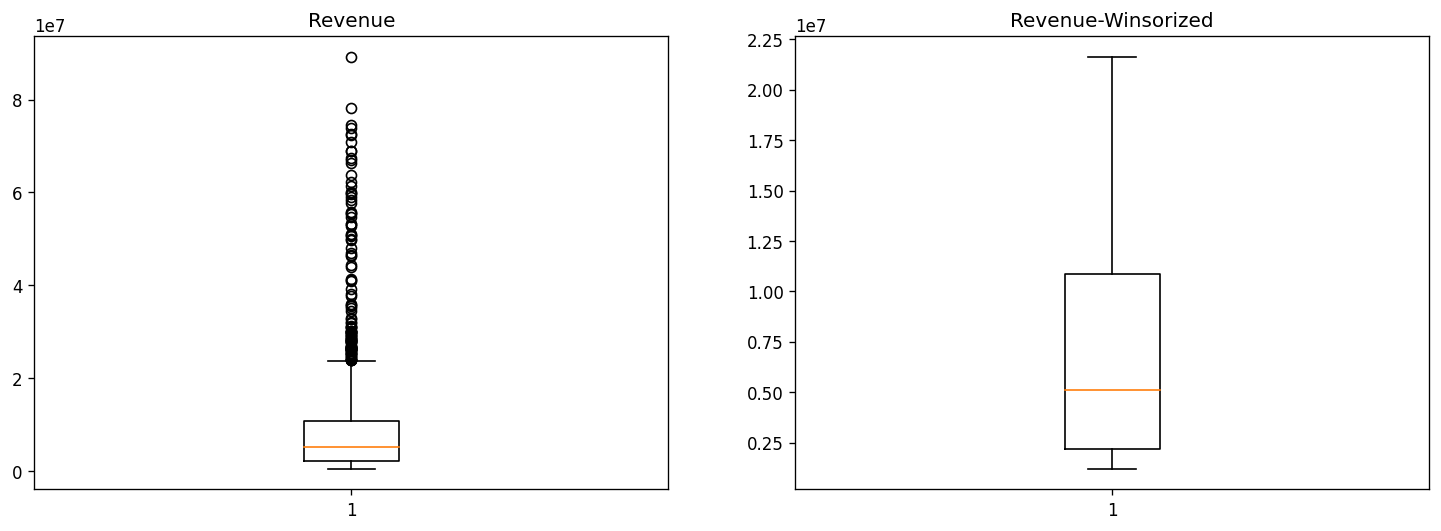

In [23]:
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize 

tr=states["TOTAL_REVENUE"].dropna()

plt.figure(figsize=(15,5),dpi=120)

plt.subplot(1,2,1)
plt.boxplot(tr)
plt.title("Revenue")

tr_winsorized=winsorize(np.array(tr),(0.10,0.10))

plt.subplot(1,2,2)
plt.boxplot(tr_winsorized)
plt.title("Revenue-Winsorized")
plt.show()


